In [1]:
%load_ext autoreload
import librosa
import compiam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mix_path = "mix.wav"
target_path = "target.mp3"

In [3]:
ftanet_carnatic = compiam.load_model("melody:ftanet-carnatic")

In [4]:
#ftanet_pitch_track = ftanet_carnatic.predict(mix_path)
ftanet_pitch_track = np.load('pitch.npy')

In [12]:
np.save('pitch.npy', ftanet_pitch_track)

In [5]:
ftanet_pitch_track[1, 0]

0.010000531236719082

In [6]:
f0 = ftanet_pitch_track[:, 1]

In [7]:
f0

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
mix = librosa.load(mix_path, sr=16000)[0]
target = librosa.load(target_path, sr=16000)[0]

In [9]:
target

array([ 5.1705697e-12, -1.6706537e-11,  1.0032448e-11, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

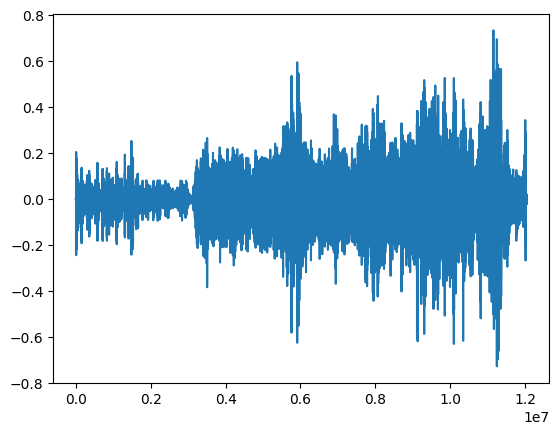

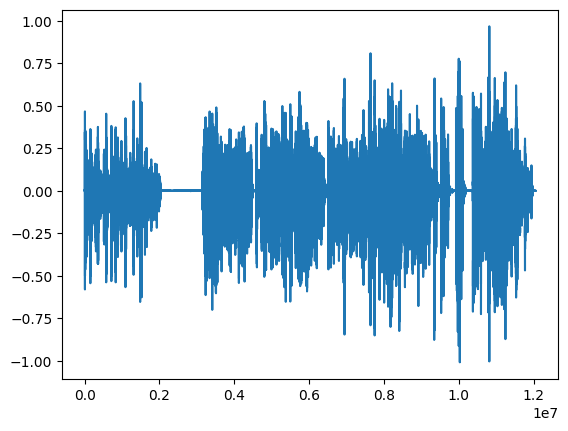

In [10]:
plt.plot(mix)
plt.show()
plt.plot(target)
plt.show()

In [11]:
ftanet_pitch_track[1, 0] * 16000

160.00849978750531

In [12]:
X = []
y = []

for i in range(0, len(mix) - 160, 160):
    X.append(mix[i: i + 160])
    y.append(target[i: i + 160])

In [13]:
X = np.array(X)[:-2]
y = np.array(y)[:-2]

In [14]:
len(y)

75297

In [15]:
import model

In [16]:
sep = model.Separator

In [17]:
import torch

In [18]:
sep(torch.tensor(X[:1]))

TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
 * (tuple of ints size, *, torch.memory_format memory_format = None, Tensor out = None, torch.dtype dtype = None, torch.layout layout = None, torch.device device = None, bool pin_memory = False, bool requires_grad = False)
